# Image Enhancements

Arithmetic Operations like addition, multiplication

Thresholding & Masking

Bitwise Operations like OR, AND, XOR

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

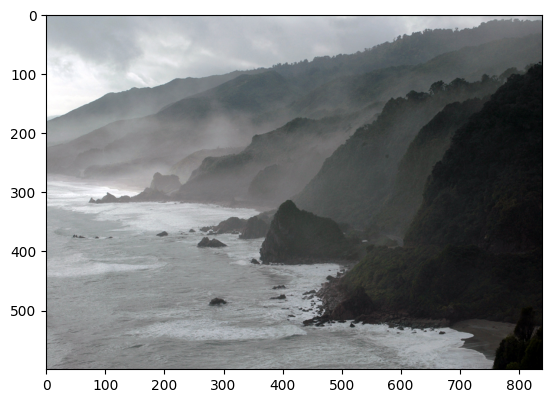

In [4]:
img_bgr = cv.imread('./nb4/New_Zealand_Coast.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Addition or Brightness

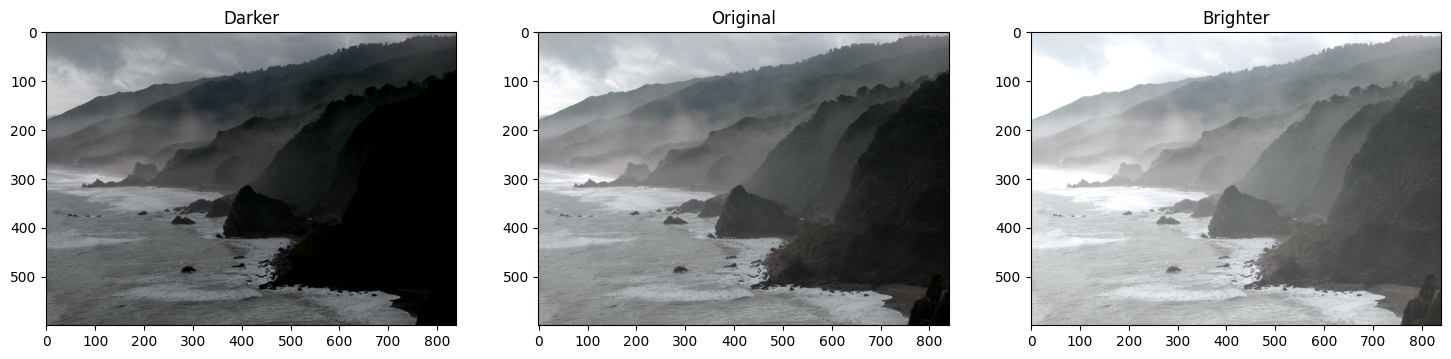

In [6]:
matrix = np.ones(img_rgb.shape, dtype='uint8') * 50
img_rgb_brighter = cv.add(img_rgb, matrix)
img_rgb_darker = cv.subtract(img_rgb, matrix)

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");

### Multiplication or Contrast
Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

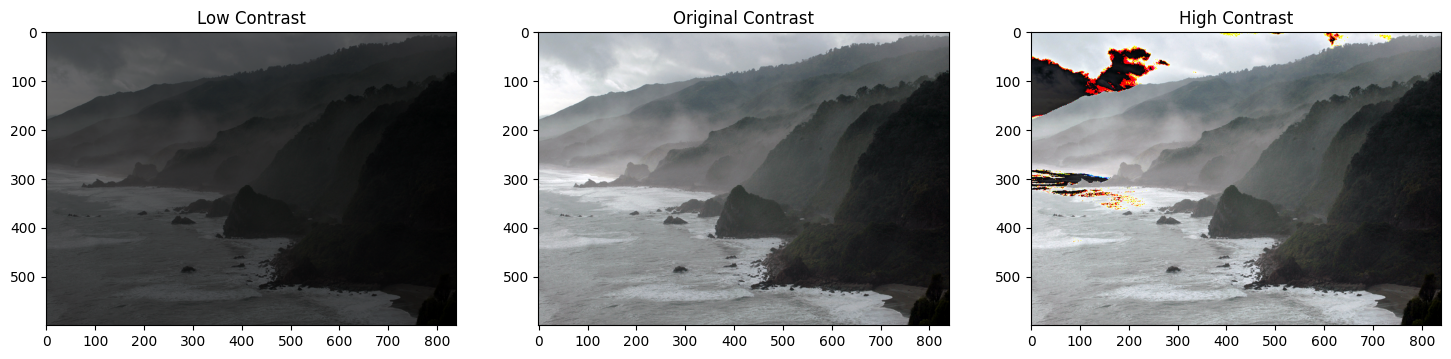

In [10]:
matrix1 = np.ones(img_rgb.shape) * 0.4
matrix2 = np.ones(img_rgb.shape) * 1.2
matrix3 = np.ones(img_rgb.shape) * 1.0

img_rgb_c_darker = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_c_brighter = np.uint8(cv.multiply(np.float64(img_rgb), matrix2))
img_rgb_c_original = np.uint8(cv.multiply(np.float64(img_rgb), matrix3))

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_c_darker); plt.title("Low Contrast");
#plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_c_brighter); plt.title("High Contrast");
plt.subplot(132); plt.imshow(img_rgb_c_original); plt.title("Original Contrast");

Can you see the weird colors in some areas of the image after multiplication?

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

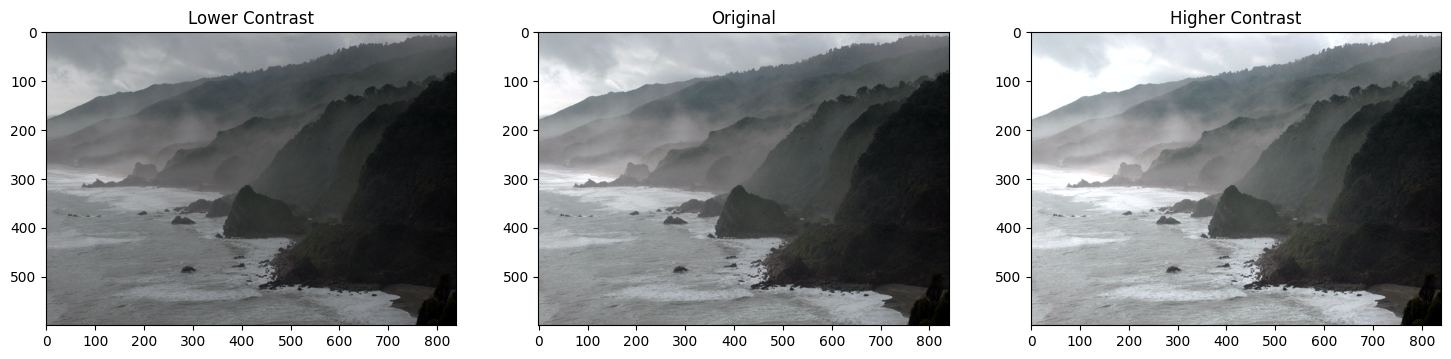

In [11]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv.multiply(np.float64(img_rgb), matrix2), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);       plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

### Image Thresholding

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

`retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )`

dst: The output array of the same size and type and the same number of channels as src.

src: input array (multiple-channel, 8-bit or 32-bit floating point).

thresh: threshold value.

maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type: thresholding type

`dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )`
dst Destination image of the same size and the same type as src.

The function has 6 required arguments:

src: Source 8-bit single-channel image.

maxValue: Non-zero value assigned to the pixels for which the condition is satisfied

adaptiveMethod: Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

thresholdType: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

(572, 800)


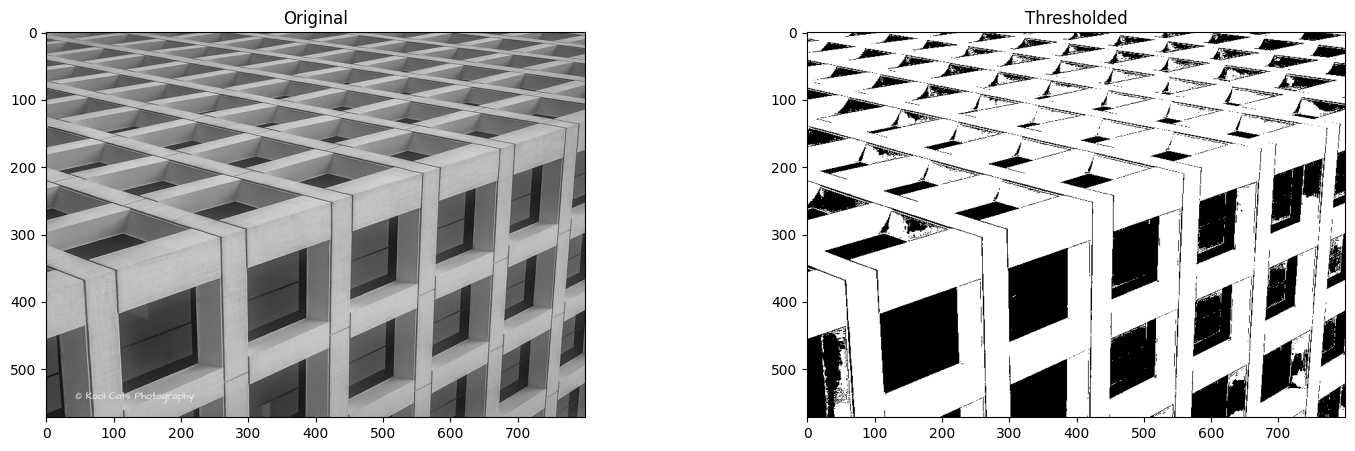

In [12]:
img_read = cv.imread('./nb4/building-windows.jpg', cv.IMREAD_GRAYSCALE)
retval, img_thresh = cv.threshold(img_read, 100, 255, cv.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)